<a href="https://colab.research.google.com/github/maliksalman55/Classifications-models/blob/main/Classifications_ResNet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
import os
import shutil

src_path = '/content/drive/MyDrive/kaggle.json'
dest_directory = '/root/.kaggle/'

# Create the destination directory if it doesn't exist
os.makedirs(dest_directory, exist_ok=True)

# Copy the Kaggle JSON file to the destination
shutil.copy(src_path, dest_directory)
#rum this for kaggle link
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d markdaniellampa/fish-dataset
# unzip download file
import zipfile
zip_ref = zipfile.ZipFile ('/content/fish-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

cp: cannot stat 'kaggle.json': No such file or directory
 99% 1.57G/1.58G [00:13<00:00, 146MB/s]
100% 1.58G/1.58G [00:13<00:00, 126MB/s]


In [5]:
import os
import shutil

src_path = '/content/drive/MyDrive/kaggle.json'
dest_directory = '/root/.kaggle/'

# Create the destination directory if it doesn't exist
os.makedirs(dest_directory, exist_ok=True)

# Copy the Kaggle JSON file to the destination
shutil.copy(src_path, dest_directory)
#rum this for kaggle link
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d markdaniellampa/fish-dataset
# unzip download file
import zipfile
zip_ref = zipfile.ZipFile ('/content/fish-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

cp: cannot stat 'kaggle.json': No such file or directory
fish-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content//FishImgDataset/train', # I pass and use train dataset path.
    labels="inferred", # because we hv labels dataset.
    label_mode="categorical",   # we use categorical became we hv more then 2 classes
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None, # if we need to rotate image then put seed value.
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8809 files belonging to 31 classes.


In [8]:
#Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/FishImgDataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2751 files belonging to 31 classes.


In [9]:
# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


94765736/94765736 [==============================] - 0s 0us/step


In [10]:
model = Sequential()

# Add the ResNet50 base model
model.add(base_model)

# Add Global Average Pooling layer
model.add(GlobalAveragePooling2D())

# Add a fully connected layer with batch normalization and dropout
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add the output layer (adjust the number of units for your dataset)
model.add(Dense(31, activation='softmax'))


In [11]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=32)


Epoch 1/32
276/276 [==============================] - 151s 388ms/step - loss: 2.8257 - accuracy: 0.3090 - val_loss: 4.7258 - val_accuracy: 0.1338
Epoch 2/32
276/276 [==============================] - 104s 373ms/step - loss: 1.7659 - accuracy: 0.5111 - val_loss: 1.9322 - val_accuracy: 0.4693
Epoch 3/32
276/276 [==============================] - 103s 370ms/step - loss: 1.1179 - accuracy: 0.6710 - val_loss: 1.9872 - val_accuracy: 0.5005
Epoch 4/32
276/276 [==============================] - 104s 373ms/step - loss: 0.8064 - accuracy: 0.7616 - val_loss: 2.1220 - val_accuracy: 0.4860
Epoch 5/32
276/276 [==============================] - 102s 367ms/step - loss: 0.5617 - accuracy: 0.8296 - val_loss: 1.3860 - val_accuracy: 0.6114
Epoch 6/32
276/276 [==============================] - 103s 369ms/step - loss: 0.3731 - accuracy: 0.8844 - val_loss: 2.1453 - val_accuracy: 0.5089
Epoch 7/32
276/276 [==============================] - 103s 370ms/step - loss: 0.2957 - accuracy: 0.9065 - val_loss: 1.1753 -

In [12]:
# Evaluating Model
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

276/276 [==============================] - 42s 149ms/step - loss: 0.1284 - accuracy: 0.9603
Training accuracy: 0.9602679014205933


In [13]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

86/86 [==============================] - 12s 120ms/step - loss: 0.2199 - accuracy: 0.9426
Validation accuracy: 0.9425663352012634


In [14]:
model.save('/content/drive/MyDrive/ResNet-50Classification-model.keras')

In [15]:
import keras
model = keras.models.load_model('/content/drive/MyDrive/ResNet-50Classification-model.keras')

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load the saved model
saved_model_path = '/content/drive/MyDrive/ResNet-50Classification-model.keras'  # Specify the path to your saved model
loaded_model = tf.keras.models.load_model(saved_model_path)

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and collect true and predicted labels
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Extract true labels
    predictions = loaded_model.predict(images)  # Predict labels
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# You can also print a classification report for additional metrics
report = classification_report(true_labels, predicted_labels, target_names=validation_set.class_names)
print("Classification Report:")
print(report)

1/1 [==============================] - 1s 943ms/step
Confusion Matrix:
[[ 48   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   1   0   2   0   0   0   0   0   0   0   0   0]
 [  0  57   0   2   0   0   0   0   0   0   0   1   0   2   0   0   0   0
    0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0  54   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   4   0   0   0   0   0   3   0   0   0   0   1]
 [  0   0   0  96   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  43   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   1   0   1   0   1   0   0   0   1   0   0   0]
 [  0   0   0   0   0  51   0   0   1   0   0   0   0   0   1   0   0   0
    0   1   0   5   0   0   0   0   0   0   0   1   0]
 [  0   0   0   2   0   0  78   0   2   0   0   0   0   0   0   0   0   0
    1   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   3   0   0   0   0 

In [18]:
training_history.history #Return Dictionary of history

{'loss': [2.825732707977295,
  1.76589035987854,
  1.1178985834121704,
  0.8063793778419495,
  0.561690628528595,
  0.3731202483177185,
  0.2956671714782715,
  0.21673649549484253,
  0.2016621232032776,
  0.199448361992836,
  0.1467486172914505,
  0.10148872435092926,
  0.1459486484527588,
  0.1499623954296112,
  0.1296643167734146,
  0.08741786330938339,
  0.12117771059274673,
  0.07120870798826218,
  0.12008995562791824,
  0.08591768145561218,
  0.11264584213495255,
  0.07220621407032013,
  0.05345359817147255,
  0.06311533600091934,
  0.07639170438051224,
  0.09755176305770874,
  0.08173678815364838,
  0.07789506763219833,
  0.07477788627147675,
  0.04773793742060661,
  0.03557398542761803,
  0.04407467693090439],
 'accuracy': [0.309002161026001,
  0.5110682249069214,
  0.6710183024406433,
  0.7616074681282043,
  0.8296060562133789,
  0.8844363689422607,
  0.9064593315124512,
  0.9318878650665283,
  0.935747504234314,
  0.93631511926651,
  0.9582245349884033,
  0.9695765972137451,
 

In [19]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [20]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [21]:
#Calculating Accuracy of Model Achieved on Validation set
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100)) # (-1) show use final Accuracy

Validation set Accuracy: 94.25663352012634 %


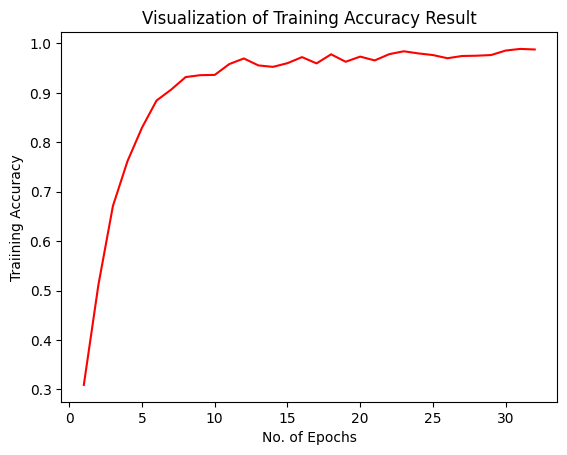

In [22]:
#Accuracy Visualization Training Visualization
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

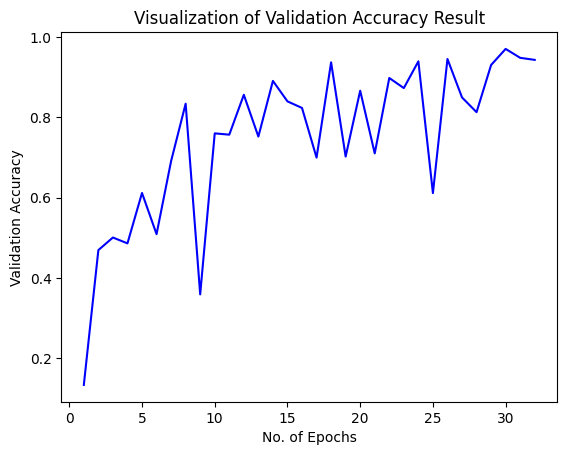

In [23]:
#Validation Accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

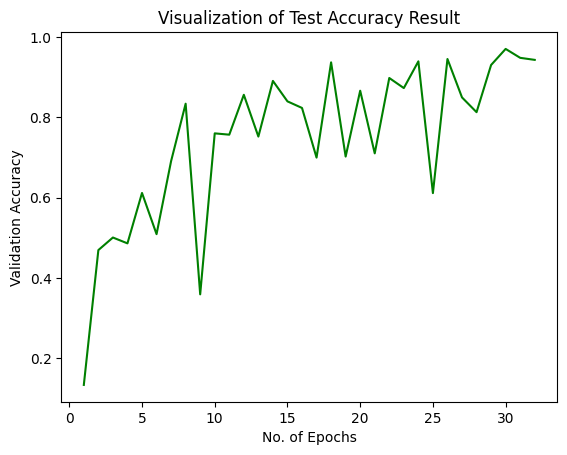

In [24]:
#Test Accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color='Green')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Test Accuracy Result')
plt.show()

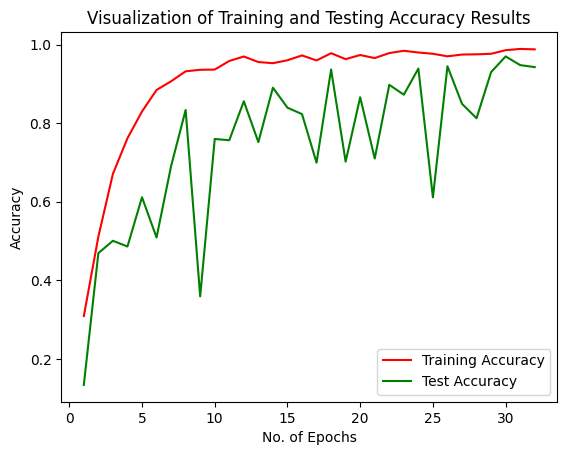

In [26]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 33)]

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='Green', label='Test Accuracy')

plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Training and Testing Accuracy Results')
plt.legend()
plt.show()